### Лабораторная №3 
### Щербо Татьяны

In [30]:
import sys
sys.executable

'/Users/soul/.ssh/oiad-3-2025/.venv/bin/python'

In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import os

data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)

!kaggle datasets download -d mosapabdelghany/medical-insurance-cost-dataset -p ./data --unzip

file_path = os.path.join("./data", "insurance.csv")
print(os.path.abspath(file_path))

HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/metadata/mosapabdelghany/medical-insurance-cost-dataset (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x10705d5d0>: Failed to resolve 'www.kaggle.com' ([Errno 8] nodename nor servname provided, or not known)"))
/Users/soul/.ssh/oiad-3-2025/Shcherbo/data/insurance.csv


In [33]:
data = pd.read_csv(file_path)
print(data.head())
print(data.count())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 1. Подготовка данных

#### 1. проверить наличие пропусков и выбросов

In [35]:
print("Пропуски в данных:")
print(data.isnull().sum())

Пропуски в данных:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [36]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    count_outliers = len(outliers)
    percent_outliers = count_outliers / len(data) * 100

    print(f"{col}: {count_outliers} ({percent_outliers:.2f}%)")

age: 0 (0.00%)
bmi: 9 (0.67%)
children: 0 (0.00%)
charges: 139 (10.39%)


In [37]:
print("Размер данных до удаления выбросов:", data.shape)

Размер данных до удаления выбросов: (1338, 7)


In [38]:
numeric_cols = ['bmi', 'charges']

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Размер данных после удаления выбросов:", data.shape)

Размер данных после удаления выбросов: (1191, 7)


#### 2. привести категориальные признаки к числовым

In [39]:
data = pd.get_dummies(data, drop_first=True)

In [90]:
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


#### 3. вычислить парные корреляции признаков

In [40]:
correlations = data.corr()
print(correlations)

                       age       bmi  children   charges  sex_male  \
age               1.000000  0.123827  0.038179  0.448798 -0.021440   
bmi               0.123827  1.000000  0.007546 -0.064483  0.016487   
children          0.038179  0.007546  1.000000  0.089083  0.015564   
charges           0.448798 -0.064483  0.089083  1.000000 -0.022893   
sex_male         -0.021440  0.016487  0.015564 -0.022893  1.000000   
smoker_yes       -0.062095 -0.260657 -0.001901  0.596213  0.014027   
region_northwest -0.002236 -0.112282  0.011655  0.037770  0.004669   
region_southeast -0.016127  0.230793 -0.014751 -0.029093 -0.003229   
region_southwest  0.017103  0.013616  0.026831 -0.076394 -0.005751   

                  smoker_yes  region_northwest  region_southeast  \
age                -0.062095         -0.002236         -0.016127   
bmi                -0.260657         -0.112282          0.230793   
children           -0.001901          0.011655         -0.014751   
charges             0.59621

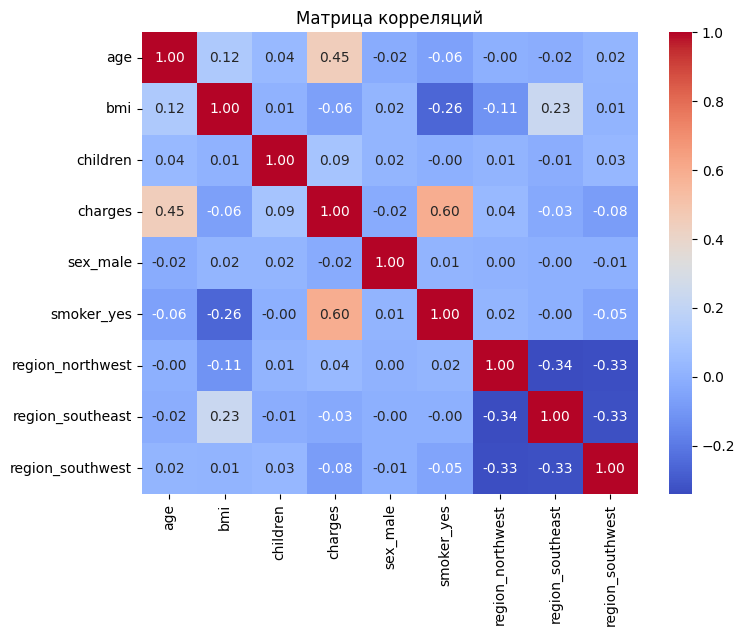

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций")
plt.show()

### 2. Многомерная линейная регрессия

Построить модель линейной регрессии и подобрать параметры:

#### 1. аналитически (реализовать самому)

$$ w = (X^T X)^{-1} X^T y $$

In [76]:
from sklearn.preprocessing import StandardScaler

X = data.drop('charges', axis=1).astype(float).values
y = data['charges'].astype(float).values.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

X_b = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

w_analytical = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(w_analytical)

[[9901.10414211]
 [3436.80857877]
 [ 405.58247534]
 [ 527.73354821]
 [-174.25105676]
 [4577.54726511]
 [-128.11071077]
 [-470.57158118]
 [-597.71254091]]


#### 2. численно, с помощью методов градиентного спуска (реализовать самому)

In [77]:
def gradient_descent(X, y, lr=0.01, n_iter=2000, delta_converged=1e-4):
    m, n = X.shape
    w = np.random.randn(n, 1)
    for _ in range(n_iter):
        gradients = 2/m * X.T @ (X @ w - y)
        old_w = w.copy()
        w -= lr * gradients
    
        if np.linalg.norm(w - old_w) < delta_converged:
            print(f"Сходимость достигнута через {_} итераций")
            break
    return w

w_gd = gradient_descent(X_b, y)
print(w_gd)

Сходимость достигнута через 1681 итераций
[[9901.10414211]
 [3436.80898035]
 [ 405.5803685 ]
 [ 527.73325452]
 [-174.25092032]
 [4577.54691884]
 [-128.10212478]
 [-470.56232057]
 [-597.7038216 ]]


### 3. Добавление регуляризации

Модифицировать линейную модель путем добавления регуляризационного слагаемого. Найти оптимальные веса:

### 1. аналитически

$$w = (X^T X + \lambda I)^{-1} X^T y$$

In [101]:
lambda_ = 10
I = np.eye(X_b.shape[1])
I[0,0] = 0
w_ridge_analytical = np.linalg.inv(X_b.T @ X_b + lambda_ * I) @ X_b.T @ y
print(w_ridge_analytical)

[[9901.10414211]
 [3407.34631515]
 [ 392.65394257]
 [ 524.2578257 ]
 [-172.50334324]
 [4534.63144133]
 [-120.12511915]
 [-458.23418631]
 [-587.41081195]]


### 2. численно

In [102]:
def gradient_descent_ridge(X, y, lr=0.01, n_iter=2000, lambda_=0.1, delta_converged=1e-4):
    m, n = X.shape
    w = np.random.randn(n, 1)
    for _ in range(n_iter):
        gradients = 2/m * X.T @ (X @ w - y) + 2 * lambda_ * np.vstack([[0], w[1:]])
        w_new = w - lr * gradients
    
        if np.linalg.norm(w_new - w) < delta_converged:
            print(f"Сходимость достигнута на итерации {_}")
            w = w_new
            break
    
        w = w_new
   
    return w

w_ridge_gd = gradient_descent_ridge(X_b, y)
print(w_ridge_gd)

Сходимость достигнута на итерации 1280
[[9901.10414205]
 [3114.74123643]
 [ 277.58976741]
 [ 489.17287769]
 [-155.79668505]
 [4115.98790378]
 [ -56.87865837]
 [-355.88298133]
 [-500.73396497]]


### 4. Оценка обобщающей способности

Сравнить между собой модели на тестовых данных по среднему квадрату ошибки:
1. константную 
2. из пункта 2
3. из пункта 3

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.3, random_state=42)

y_pred_const = np.mean(y_train) * np.ones_like(y_test)

y_pred_analytical = X_test @ w_analytical
y_pred_gd = X_test @ w_gd
y_pred_ridge = X_test @ w_ridge_analytical
y_pred_ridge_gd = X_test @ w_ridge_gd

print(f"MSE константной модели: {mean_squared_error(y_test, y_pred_const):.2e}")
print(f"MSE линейной регрессии аналитически: {mean_squared_error(y_test, y_pred_analytical):.2e}")
print(f"MSE линейной регрессии градиентом: {mean_squared_error(y_test, y_pred_gd):.2e}")
print(f"MSE Ridge: {mean_squared_error(y_test, y_pred_ridge):.2e}")
print(f"MSE Ridge_gd: {mean_squared_error(y_test, y_pred_ridge_gd):.2e}")

MSE константной модели: 5.39e+07
MSE линейной регрессии аналитически: 2.02e+07
MSE линейной регрессии градиентом: 2.02e+07
MSE Ridge: 2.01e+07
MSE Ridge_gd: 2.03e+07


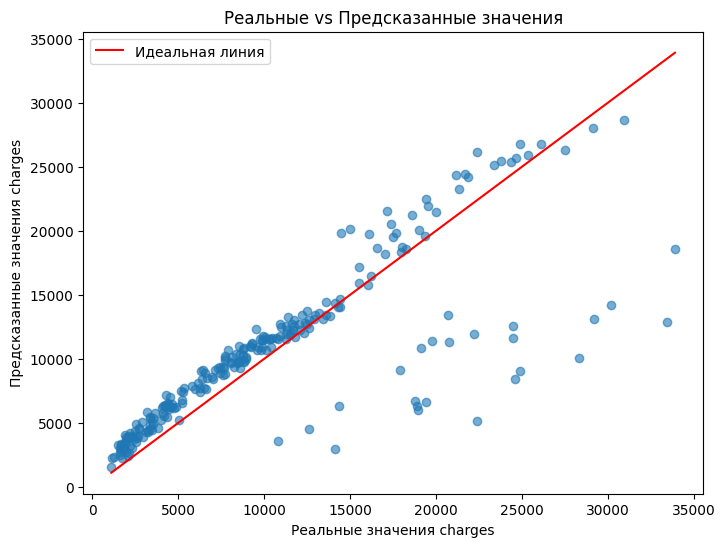

In [ ]:
y_pred = y_pred_analytical  

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', label='Идеальная линия')
plt.xlabel('Реальные значения charges')
plt.ylabel('Предсказанные значения charges')
plt.title('Реальные vs Предсказанные значения')
plt.legend()
plt.show()

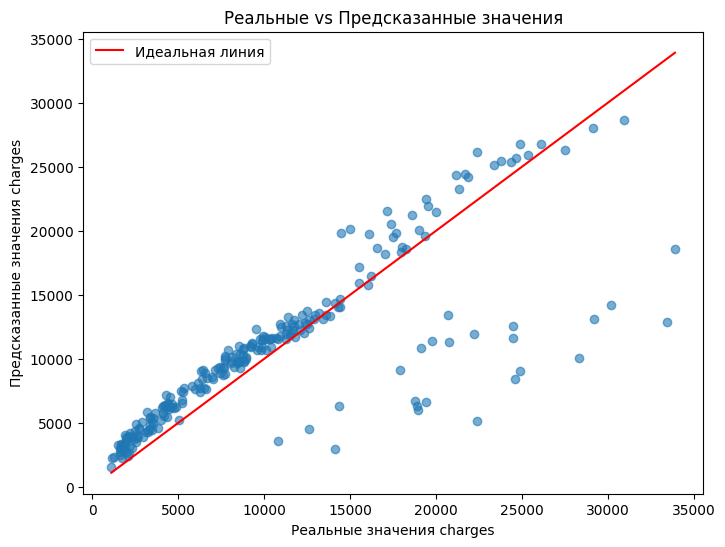

In [53]:
y_pred = y_pred_gd 

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', label='Идеальная линия')
plt.xlabel('Реальные значения charges')
plt.ylabel('Предсказанные значения charges')
plt.title('Реальные vs Предсказанные значения')
plt.legend()
plt.show()

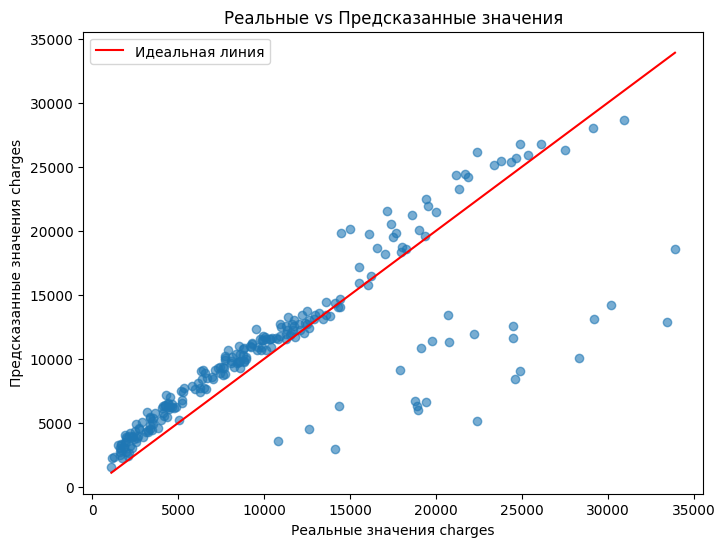

In [54]:
y_pred = y_pred_ridge  

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', label='Идеальная линия')
plt.xlabel('Реальные значения charges')
plt.ylabel('Предсказанные значения charges')
plt.title('Реальные vs Предсказанные значения')
plt.legend()
plt.show()

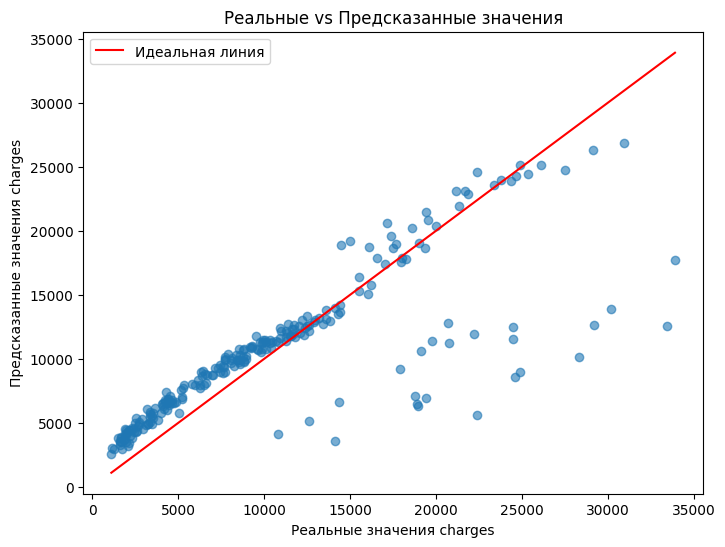

In [60]:
y_pred = y_pred_ridge_gd  

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', label='Идеальная линия')
plt.xlabel('Реальные значения charges')
plt.ylabel('Предсказанные значения charges')
plt.title('Реальные vs Предсказанные значения')
plt.legend()
plt.show()